In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from visual_convolution import stepped_convolution, visual_convolution, show_matrix

In [2]:
base = """
5 2 6 2 3 2 1 2 3 1
1 3 6 7 9 2 4 4 7 1
1 5 8 8 10 17 21 19 9 4
4 18 34 56 17 25 38 17 7 2
1 14 22 43 68 91 62 23 16 7
6 12 21 21 39 87 76 34 4 2
9 24 54 73 88 95 69 16 12 5
3 5 6 40 34 42 6 4 2 5
4 9 16 14 32 51 13 6 6 2
4 2 5 3 3 3 5 3 3 3
"""

# Convert into an array of ints
base = np.array([[float(number) for number in line.split(" ")] for line in base.split("\n") if line != ""])

show_matrix(base, title='base')

<IPython.core.display.Latex object>

In [3]:
def show(image):
    # Helper-method to show an image
    return plt.imshow(image.astype(int), cmap="gray", norm=NoNorm())

### Implementierung des Faltungsoperators, mit Zero-Padding

In [4]:
def convolve(image, kernel):
    # Zero-Padding
    _image = np.pad(image, ((1, 1), (1, 1)), 'constant')

    output_image = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        # Cut out the part of the image which we consider for this iteration...
        window = _image[x:x+3, y:y+3] # image[x-1:x+2, y-1:y+2] but x=x+1, y=y+1 because of pad
        
        # ... and multiply it element-wise with the kernel, and sum up everything afterwards.
        output_image[x, y] = np.sum(np.multiply(window, kernel))

    return output_image

### Implementierung der Grauwertspeizung
(Quelle: http://home.in.tum.de/~perzylo/Proseminar/Punktoperatoren.pdf S.12)

$$ g_{neu} = \begin{cases}
                    0 & falls\:g < g_1  \\
                    G - 1 & falls\:g > g_2 \\
                    \frac{g-g_1}{g_2-g_1}*(G-1) & sonst\\
                 \end{cases} $$

In [5]:
def spread_gray_value(image, g_1=None, g_2=None, G=255):
    if g_1 is None:
        g_1 = np.min(image)
    if g_2 is None:
        g_2 = np.max(image)

    output = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        if value < g_1:
            output[x, y] = 0
        elif value > g_2:
            output[x, y] = G - 1
        else:
            output[x, y] = (G - 1)*(value - g_1)/(g_2 - g_1)
    return output

In [6]:
base_spread = spread_gray_value(base)

# 1) Mittelwertfilter

In [7]:
average_kernel = np.ones((3,3)) * 1/9
base_averaged = convolve(base, average_kernel)
base_averaged_spread = spread_gray_value(base_averaged)

stepped_convolution(base, average_kernel)
show_matrix(base_averaged, title='base\_averaged')
show_matrix(base_averaged_spread, title='base\_averaged\_spread')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 2) Sobel-Operatoren

### Sobel-Operator in x-Richtung

In [8]:
S_x = 0.25 * np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

S_x_inv = -S_x

show_matrix(S_x, title='S_x', round_=False)

<IPython.core.display.Latex object>

In [14]:
x = convolve(base, S_x)
x_inv = convolve(base, S_x_inv)
x_spread = spread_gray_value(x)

stepped_convolution(base, S_x)
show_matrix(x, title='x')
show_matrix(x_spread, title='x\_spread')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Sobel-Operator in y-Richtung

In [16]:
S_y = 0.25 * np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

S_y_inv = -S_y


show_matrix(S_y, title='S_y', round_=False)

<IPython.core.display.Latex object>

In [17]:
y = convolve(base, S_y)
y_inv = convolve(base, S_y_inv)
y_spread = spread_gray_value(y)

stepped_convolution(base, S_y)
show_matrix(y, title='y')
show_matrix(y_spread, title='y\_spread')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 3) Berechnung der Kanten (Sobel-Operator-Max)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

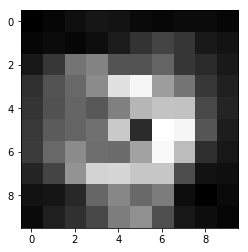

In [21]:
g = np.maximum(np.maximum(x, x_inv), np.maximum(y, y_inv))
g_spread = spread_gray_value(g)

show_matrix(g, title='g')
show_matrix(g_spread, title='g\_spread')
show(g_spread)

# 4) Darstellungen der einzelnen Schritte

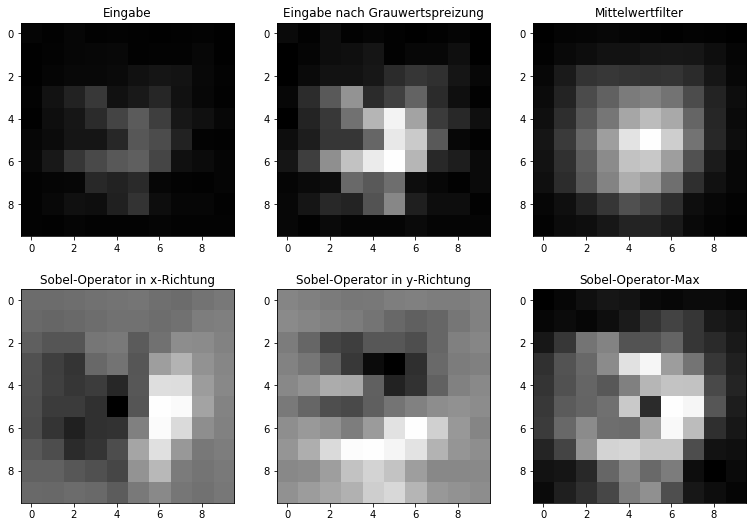

In [22]:
fig = plt.figure(figsize=(13, 9))

rows = 2
columns = 3

in_ = fig.add_subplot(rows, columns, 1)
in_.set_title("Eingabe")
show(base)

in_spread = fig.add_subplot(rows, columns, 2)
in_spread.set_title("Eingabe nach Grauwertspreizung")
show(base_spread)

avg = fig.add_subplot(rows, columns, 3)
avg.set_title("Mittelwertfilter")
show(base_averaged_spread)

x_plt = fig.add_subplot(rows, columns, 4)
x_plt.set_title("Sobel-Operator in x-Richtung")
show(x_spread)

y_plt = fig.add_subplot(rows, columns, 5)
y_plt.set_title("Sobel-Operator in y-Richtung")
show(y_spread)

g_plt = fig.add_subplot(rows, columns, 6)
g_plt.set_title("Sobel-Operator-Max")
show(g_spread)

plt.show()